In [13]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import numpy as np
from io import BytesIO
import datetime

In [65]:

def getcorpus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def cloud(text,imgurl,save):
    response1 = requests.get(imgurl)
    img = Image.open(BytesIO(response1.content))
    mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def cloudtweek(text,imgurl,maxsize , maxwords, save, title):
    response1 = requests.get(imgurl)
    img = Image.open(BytesIO(response1.content))
    mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=maxwords,max_font_size=maxsize,  mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
    
    
    


In [49]:
HP1 = getcorpus("https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt")
HP1 =HP1.replace('Page     Harry Potter and the Philosophers Stone   J K  Rowling', '') 


stopwords = set(STOPWORDS)



# owl, snake, wolf or moon, goblet, pheonix, book, snitch

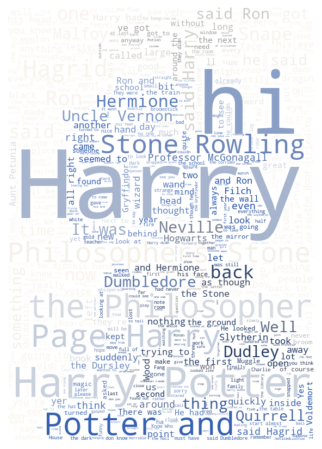

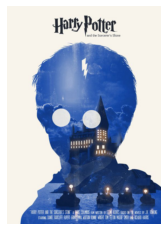

In [40]:
cloud(HP1, "https://i.pinimg.com/originals/03/24/d3/0324d3cfb875e7f0f3524b4d6cbf0190.jpg", "non")

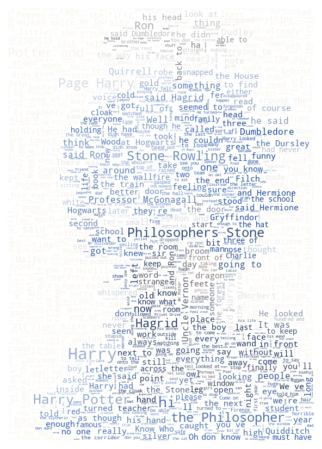

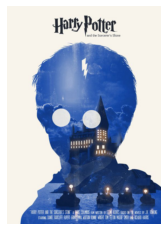

In [28]:
cloudtweek(HP1,"https://i.pinimg.com/originals/03/24/d3/0324d3cfb875e7f0f3524b4d6cbf0190.jpg", 30, 50000, 'no')

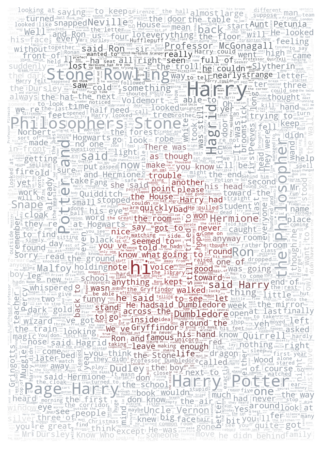

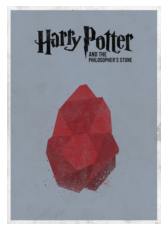

In [29]:
cloudtweek(HP1, "https://mmminimal.com/wp-content/uploads/2011/07/tumblr_loxnao4lYs1qbrrk5o5_1280.jpg", 60, 4000,"no")

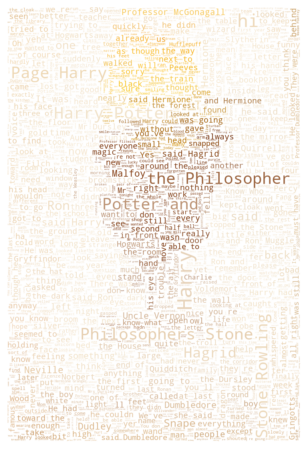

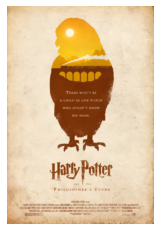

In [30]:
cloudtweek(HP1, "https://66.media.tumblr.com/tumblr_m8v52bCsKj1r5pjkqo1_1280.jpg", 50, 4000,"no")

In [60]:
cloudtweek(HP1, "https://i.ibb.co/RhLYLF4/slack-imgs-01.png",  80, 50000, 'yes', "Harry Potter and the Sorcerer's Stone")

KeyboardInterrupt: 

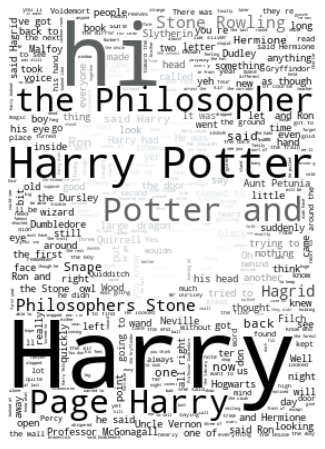

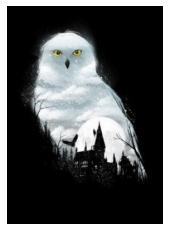

In [21]:
cloud(HP1, "https://i.pinimg.com/474x/24/dc/9a/24dc9ad6168f9d76c9f2cdf22d0fe09b.jpg", 'no')

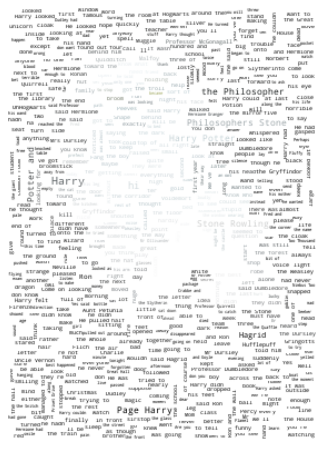

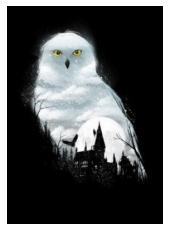

In [25]:
cloudtweek(HP1, "https://i.pinimg.com/474x/24/dc/9a/24dc9ad6168f9d76c9f2cdf22d0fe09b.jpg", 10, 4000,"no")

In [51]:
HP2 = getcorpus("http://www.pauladaunt.com/books/Children's/Harry_Potter1-4-1/J.%20K.%20Rowling%20-%20Harry%20Potter%202%20-%20The%20Chamber%20Of%20Secrets.txt")


In [136]:
def cloud_local(text,img,save, color):
    mask = np.array(Image.open(img))
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
  
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

In [132]:
import random
mask = np.array(Image.open("slack-imgs edit.jpg"))

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,background_color="white",
               random_state=1).generate(HP1)


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 100))

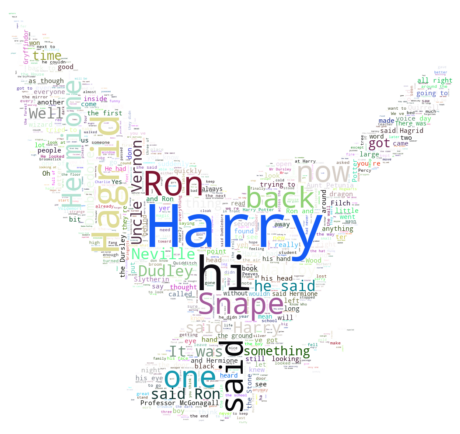

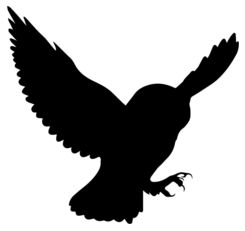

In [139]:

cloud_local(HP1, "slack-imgs edit.jpg", "yes", "random")

<Figure size 432x288 with 0 Axes>

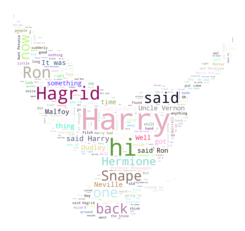

<Figure size 432x288 with 0 Axes>

In [134]:
default_colors = wc.to_array()

plt.imshow(wc.recolor(color_func=random_color_func),
           interpolation="bilinear")
plt.axis("off")
plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
   
#wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()



